# <span style="color:rgb(255, 0, 255)">Code for the mid-projet Tapas group. Modeling</span> 

## 0 | Define the problem </span>

We (Ricardo, Carlos and Nara) are working as data analysts for a real estate company. Our company wants to build a **machine learning model** to predict the **selling prices of houses** based on a variety of features on which the value of the house is evaluated.

**Objective**

Our job is to build a model that will predict the price of a house based on features provided in the dataset. 

Senior management also wants to explore the characteristics of the houses using some business intelligence tools. One of those parameters includes understanding which factors are responsible for higher property value - $650K and above. **This will be analyzed through SQL.

## 1 | Gather data </span>

### <span style="color:rgb(255, 0, 255)">--- Import the necessary libraries</span>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.ticker as mk
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

import os #we will use the function listdir to list files in a folder
import math #to apply absolute value

### <span style="color:rgb(255, 0, 255)">--- Load the database</span>

In [2]:
data = pd.read_csv('table_SQL_650.csv')
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7237550310,2014-05-12,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1230000
1,1736800520,2015-04-03,3,2.50,3560,9796,1.0,0,0,3,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925,662500
2,2524049179,2014-08-26,3,2.75,3050,44867,1.0,0,4,3,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336,2000000
3,1794500383,2014-06-26,3,1.75,2450,2691,2.0,0,0,3,8,1750,700,1915,0,98119,47.6386,-122.360,1760,3573,937000
4,3303700376,2014-12-01,3,1.00,1400,1581,1.5,0,0,5,8,1400,0,1909,0,98112,47.6221,-122.314,1860,3861,667000


## 2 | Pre-process data </span>

### <span style="color:rgb(255, 0, 255)">--- First explorations (head, shape, info).

In [3]:
data.shape

(5205, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5205 entries, 0 to 5204
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5205 non-null   int64  
 1   date           5205 non-null   object 
 2   bedrooms       5205 non-null   int64  
 3   bathrooms      5205 non-null   float64
 4   sqft_living    5205 non-null   int64  
 5   sqft_lot       5205 non-null   int64  
 6   floors         5205 non-null   float64
 7   waterfront     5205 non-null   int64  
 8   view           5205 non-null   int64  
 9   condition      5205 non-null   int64  
 10  grade          5205 non-null   int64  
 11  sqft_above     5205 non-null   int64  
 12  sqft_basement  5205 non-null   int64  
 13  yr_built       5205 non-null   int64  
 14  yr_renovated   5205 non-null   int64  
 15  zipcode        5205 non-null   int64  
 16  lat            5205 non-null   float64
 17  long           5205 non-null   float64
 18  sqft_liv

In [5]:
data.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,5.205000e+03,5205.000000,5205.000000,5205.000000,5.205000e+03,5205.000000,5205.000000,5205.000000,5205.000000,5205.000000,5205.000000,5205.000000,5205.000000,5205.000000,5205.000000,5205.00000,5205.000000,5205.000000,5205.000000,5.205000e+03
mean,4.509665e+09,3.830355,2.687752,3020.285495,2.139565e+04,1.717099,0.025552,0.634774,3.462440,8.869933,2553.876273,466.409222,1972.919116,161.707205,98073.549856,47.61964,-122.202455,2633.483766,16316.703746,9.986294e+05
std,2.939103e+09,0.889473,0.791278,1028.934611,6.068848e+04,0.493068,0.157811,1.204710,0.688646,1.224819,985.331592,575.318460,32.576260,545.172471,51.315744,0.07463,0.135115,783.978510,35350.065948,4.807615e+05
min,3.600072e+06,1.000000,0.750000,890.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,5.000000,580.000000,0.000000,1900.000000,0.000000,98001.000000,47.15930,-122.514000,860.000000,967.000000,6.501000e+05
25%,1.931300e+09,3.000000,2.250000,2350.000000,5.401000e+03,1.000000,0.000000,0.000000,3.000000,8.000000,1770.000000,0.000000,1951.000000,0.000000,98033.000000,47.57080,-122.312000,2030.000000,5300.000000,7.300000e+05
50%,3.885803e+09,4.000000,2.500000,2910.000000,8.616000e+03,2.000000,0.000000,0.000000,3.000000,9.000000,2460.000000,0.000000,1981.000000,0.000000,98074.000000,47.62980,-122.209000,2590.000000,8437.000000,8.350000e+05
75%,7.308600e+09,4.000000,3.250000,3520.000000,1.455000e+04,2.000000,0.000000,0.000000,4.000000,10.000000,3180.000000,890.000000,2001.000000,0.000000,98115.000000,47.67290,-122.106000,3150.000000,13068.000000,1.060000e+06
max,9.839301e+09,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.77640,-121.691000,6210.000000,871200.000000,7.700000e+06


In [6]:
#let's see first if we have any duplicated rows with nan values in those rows aka no info in that entry
duplicate_rows = data[data.duplicated()]
duplicate_rows

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price


In [7]:
# Let's see nans
data.isna().sum() 
#There are none! (haha)

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

***

### <span style="color:rgb(255, 0, 255)">--- Check for the format of date columns</span>

In [8]:
data.dtypes

id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

### <span style="color:rgb(255, 0, 255)">--- Check for the kind of features that we have</span>

<span style="color:rgb(255, 0, 255)">They are not categorical values, lets explore each column to know how to treat them (specially the discrete ones)</span>

In [9]:
for col in data.columns:
    print(data[col].value_counts())

3630120700    2
2619920170    2
7856400300    2
8129700644    2
3528000040    2
             ..
3275850190    1
1025049174    1
2487700130    1
4217400185    1
7936000429    1
Name: id, Length: 5188, dtype: int64
2014-06-26    40
2014-06-20    38
2015-04-27    36
2015-04-23    36
2015-03-25    35
              ..
2014-08-10     1
2014-09-13     1
2015-05-09     1
2015-02-14     1
2014-11-01     1
Name: date, Length: 337, dtype: int64
4     2513
3     1548
5      742
2      228
6      135
7       20
8        8
1        5
9        4
10       2
Name: bedrooms, dtype: int64
2.50    1472
2.75     525
3.50     520
2.25     456
1.75     406
3.25     396
3.00     327
2.00     285
1.00     175
1.50     158
3.75     132
4.00     117
4.50      81
4.25      74
4.75      21
5.00      17
5.25      11
5.50      10
6.00       6
5.75       3
6.75       2
8.00       2
0.75       2
1.25       2
6.25       2
6.50       2
7.75       1
Name: bathrooms, dtype: int64
3190    35
2440    35
3010    34
2620    3

In [10]:
#Inspired by Luis's Code
#Check unique values for each value
for column in data.columns:
    print('─' * 10)
    print("This feature ", '\033[1m' + column + '\033[0m' ," has ", data[column].nunique(), " categories \n The single values are: ", data[column].unique(),"\n" )
    print("Here the detail: \n" , data[column].value_counts())
    print("\n\n")

──────────
This feature  id  has  5188  categories 
 The single values are:  [7237550310 1736800520 2524049179 ... 7202300110  249000205 7936000429] 

Here the detail: 
 3630120700    2
2619920170    2
7856400300    2
8129700644    2
3528000040    2
             ..
3275850190    1
1025049174    1
2487700130    1
4217400185    1
7936000429    1
Name: id, Length: 5188, dtype: int64



──────────
This feature  date  has  337  categories 
 The single values are:  ['2014-05-12' '2015-04-03' '2014-08-26' '2014-06-26' '2014-12-01'
 '2015-03-02' '2014-06-24' '2014-06-13' '2014-08-11' '2014-07-07'
 '2014-10-28' '2014-07-16' '2015-03-11' '2015-03-03' '2014-08-27'
 '2014-09-09' '2014-06-12' '2014-09-12' '2014-11-05' '2015-03-23'
 '2014-11-14' '2014-12-23' '2014-09-08' '2014-06-11' '2014-12-12'
 '2014-10-07' '2015-03-05' '2014-11-21' '2015-01-02' '2014-06-18'
 '2015-04-28' '2015-01-26' '2014-06-27' '2014-12-03' '2014-06-25'
 '2015-04-01' '2015-03-04' '2015-03-24' '2014-06-05' '2015-01-16'
 '2014-0

#### <span style="color:rgb(255, 0, 255)"> **Continous**
    Nominal
        
        sqft_living, sqft_lot, sqft_above, sqft_basement, lat, long, sqft_living15, sqft_lot15.
        
    Ordinal
        yr_built, yr_renovated, zipcode, price (target), month_bought, year_bought
    
#### <span style="color:rgb(255, 0, 255)"> **Discrete** 
    
    Bedrooms, bathrooms, floors, waterfront, view, condition, grade
    
#### <span style="color:rgb(255, 0, 255)"> **Categoricals** 
    
None

***

### <span style="color:rgb(255, 0, 255)">--- Data cleaning: </span>

#### <span style="color:rgb(255, 0, 255)"> Put the columns names on point:

In [11]:
data.columns
# they look pretty fine

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

#### <span style="color:rgb(255, 0, 255)">Drop columns that we don't longer need:

In [12]:
df = data.copy() # for that we are using df as a table to do all the changes
df = df.drop(['id'], axis=1)
df.head() #we don't need "id" for the model because is an ID

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2014-05-12,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1230000
1,2015-04-03,3,2.50,3560,9796,1.0,0,0,3,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925,662500
2,2014-08-26,3,2.75,3050,44867,1.0,0,4,3,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336,2000000
3,2014-06-26,3,1.75,2450,2691,2.0,0,0,3,8,1750,700,1915,0,98119,47.6386,-122.360,1760,3573,937000
4,2014-12-01,3,1.00,1400,1581,1.5,0,0,5,8,1400,0,1909,0,98112,47.6221,-122.314,1860,3861,667000


### <span style="color:rgb(255, 0, 255)">--- Visualize values

</span>

<span style="color:rgb(255, 0, 255)"> To not saturate this notebook we have created another notebook for the data vizualization.

In [13]:
# For that, we are saving the csv that we have at this point:
df.to_csv('for_data_viz.csv', index=False)

### <span style="color:rgb(255, 0, 255)">--- Remove outliers</span>

<span style="color:rgb(255, 0, 255)"> In the first try we didn't remove outliers and it gave us a R2 of 0.68 in the linnear regression model. To revisit this try please check Vol 1. of the try-and-errors folder. After a little bit (too much) of trying with outliers, **the outliers' cleaning that afected the best to the model was removing only the outliers of sqft_lot and sqft_lot15**.

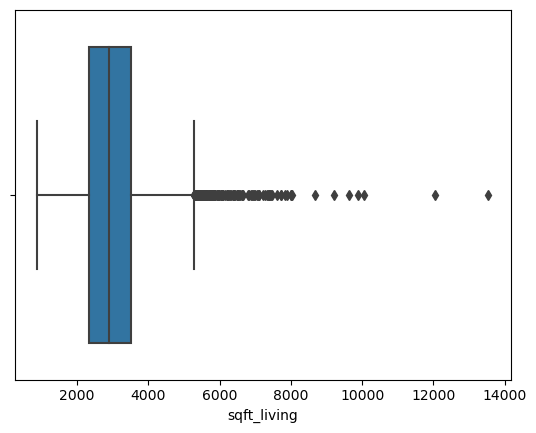

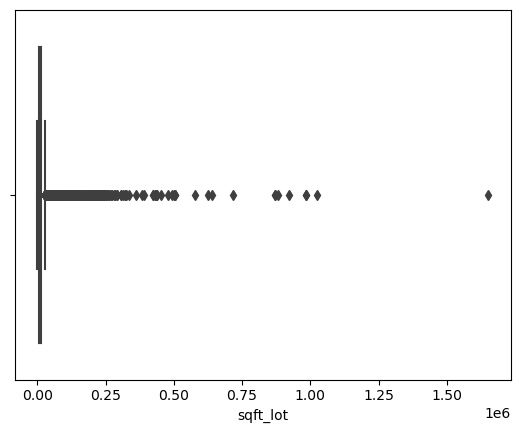

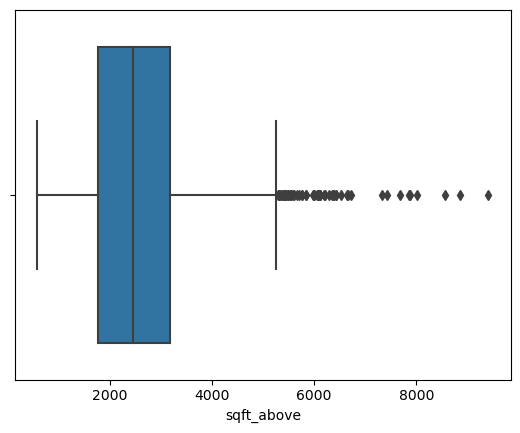

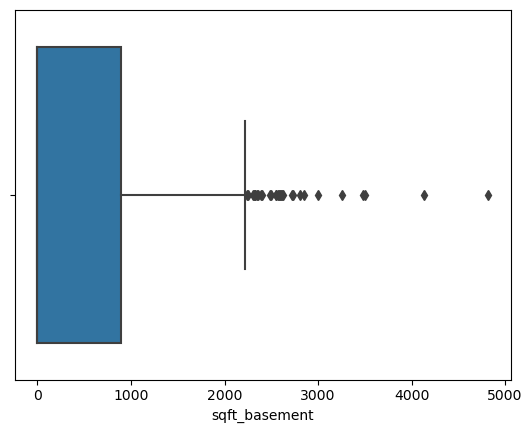

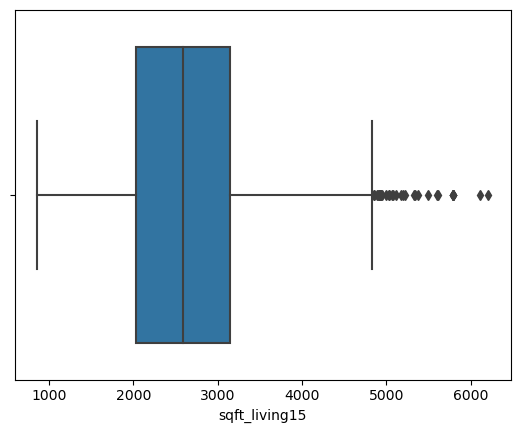

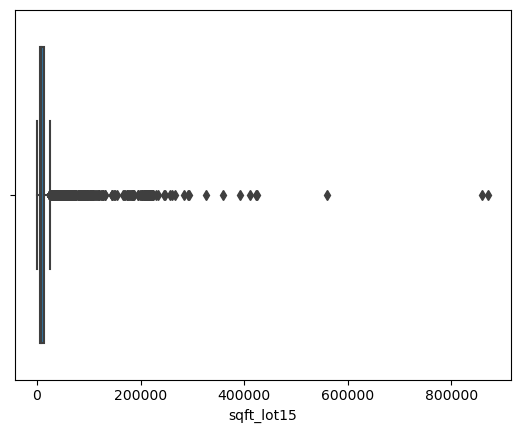

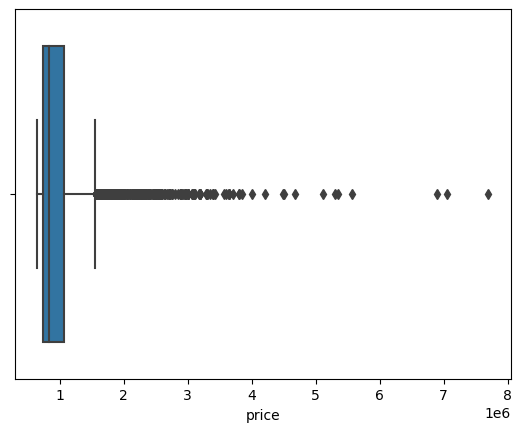

In [14]:
#Create a group of boxplots
cont = df[["sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "sqft_living15", "sqft_lot15", "price"]]
for i, col in enumerate(cont.columns):
    plt.figure(i)
    sns.boxplot(x=cont[col] ,whis=1.5)

In [15]:
#Remove outliers sqft_lot
iqr = np.percentile(df['sqft_lot'],75) - np.percentile(df['sqft_lot'],25)
upper_limit = np.percentile(df['sqft_lot'],75) + 1.5*iqr
lower_limit = np.percentile(df['sqft_lot'],25) - 1.5*iqr
df = df[(df['sqft_lot']>lower_limit) & (df['sqft_lot']<upper_limit)]
df.shape

(4534, 20)

In [16]:
#Remove outliers sqft_lot15
iqr = np.percentile(df['sqft_lot15'],75) - np.percentile(df['sqft_lot15'],25)
upper_limit = np.percentile(df['sqft_lot15'],75) + 1.5*iqr
lower_limit = np.percentile(df['sqft_lot15'],25) - 1.5*iqr
df = df[(df['sqft_lot15']>lower_limit) & (df['sqft_lot15']<upper_limit)]
df.shape

(4329, 20)

### <span style="color:rgb(255, 0, 255)">--- Feature engineering:

#### <span style="color:rgb(255, 0, 255)"> 1. Create columns for year, month, day so we can use this info for the model:

#### <span style="color:rgb(255, 0, 255)"> 2. Create a column for the difference between the year it was built and the year it was renovated:

In [18]:
df["yr_diff_renovated"] = df["yr_renovated"] - df["yr_built"]

#### <span style="color:rgb(255, 0, 255)"> 4. Create a column for the difference between the square ft in total and the square ft that are built for living:

In [20]:
df["sqft_diff"] = df["sqft_lot"] - df["sqft_living"]

#### <span style="color:rgb(255, 0, 255)"> 5. The same but for the renovation in 2015:

In [21]:
df["sqrt_diff_15"] = df["sqft_lot15"] - df["sqft_living15"]

#### <span style="color:rgb(255, 0, 255)">  6. Create a column for whether it has basement or not:

In [22]:
df["basement_binary"] = df["sqft_basement"].apply(lambda x: 1 if x>0 else 0)

#### <span style="color:rgb(255, 0, 255)">  7. Encode Zipcode to create new column of regions:

<span style="color:rgb(255, 0, 255)"> In Tableau we saw that this dataset corresponds to the State of Washington and to two different regions, thats why some houses have the zipcode starting with "980" and some with "981". We create a column differenting each region.  

In [23]:
def zip_to_binary(zipcode):
    if str(zipcode).startswith('980'):
        return 0
    elif str(zipcode).startswith('981'):
        return 1
    else:
        return None

df['zipcode_binary'] = df['zipcode'].apply(zip_to_binary)

In [25]:
df = df.drop( columns =["date"], axis=1)
df.head()


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,yr_diff_renovated,sqft_diff,sqrt_diff_15,basement_binary,zipcode_binary
1,3,2.50,3560,9796,1.0,0,0,3,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925,662500,-1965,6236,6715,1,0
3,3,1.75,2450,2691,2.0,0,0,3,8,1750,700,1915,0,98119,47.6386,-122.360,1760,3573,937000,-1915,241,1813,1,1
4,3,1.00,1400,1581,1.5,0,0,5,8,1400,0,1909,0,98112,47.6221,-122.314,1860,3861,667000,-1909,181,2001,0,1
5,4,2.50,2570,7173,2.0,0,0,3,8,2570,0,2005,0,98052,47.7073,-122.110,2630,6026,719000,-2005,4603,3396,0,0
6,4,1.75,2330,5000,1.5,0,0,4,7,1510,820,1929,0,98117,47.6823,-122.368,1460,5000,687500,-1929,2670,3540,1,1


#### <span style="color:rgb(255, 0, 255)">  8. Whether it has been renovated or not:

In [26]:
df["renovated_yes_no"]= df["yr_diff_renovated"].apply(lambda x: 1 if x>0 else 0)

### <span style="color:rgb(255, 0, 255)"> --- Feature selection

</span>

<span style="color:rgb(255, 0, 255)"> The goal of feature selection is to improve model accuracy by reducing the number of irrelevant or redundant features that may introduce noise or bias in the model. **For that, we studied the effect of bucketing some numerical discrete features and it didn't have any effect in the model.** To review this try visit Vol.2 of the try-and-errors folder.

##  3 | Prepare the data for the model </span>

### <span style="color:rgb(255, 0, 255)">--- Transforming Skewed data with log transformation

<span style="color:rgb(255, 0, 255)"> In the data viz notebook you can see that: sqft_living, sqft_above and sqft_living15 are really skewed.

In [27]:
# sqft_living, sqft_above, sqft_living15
df["sqft_living_log"] = np.log((df.sqft_living))
df["sqft_above_log"] = np.log((df.sqft_above))
df["sqft_living15_log"] = np.log((df.sqft_living15))


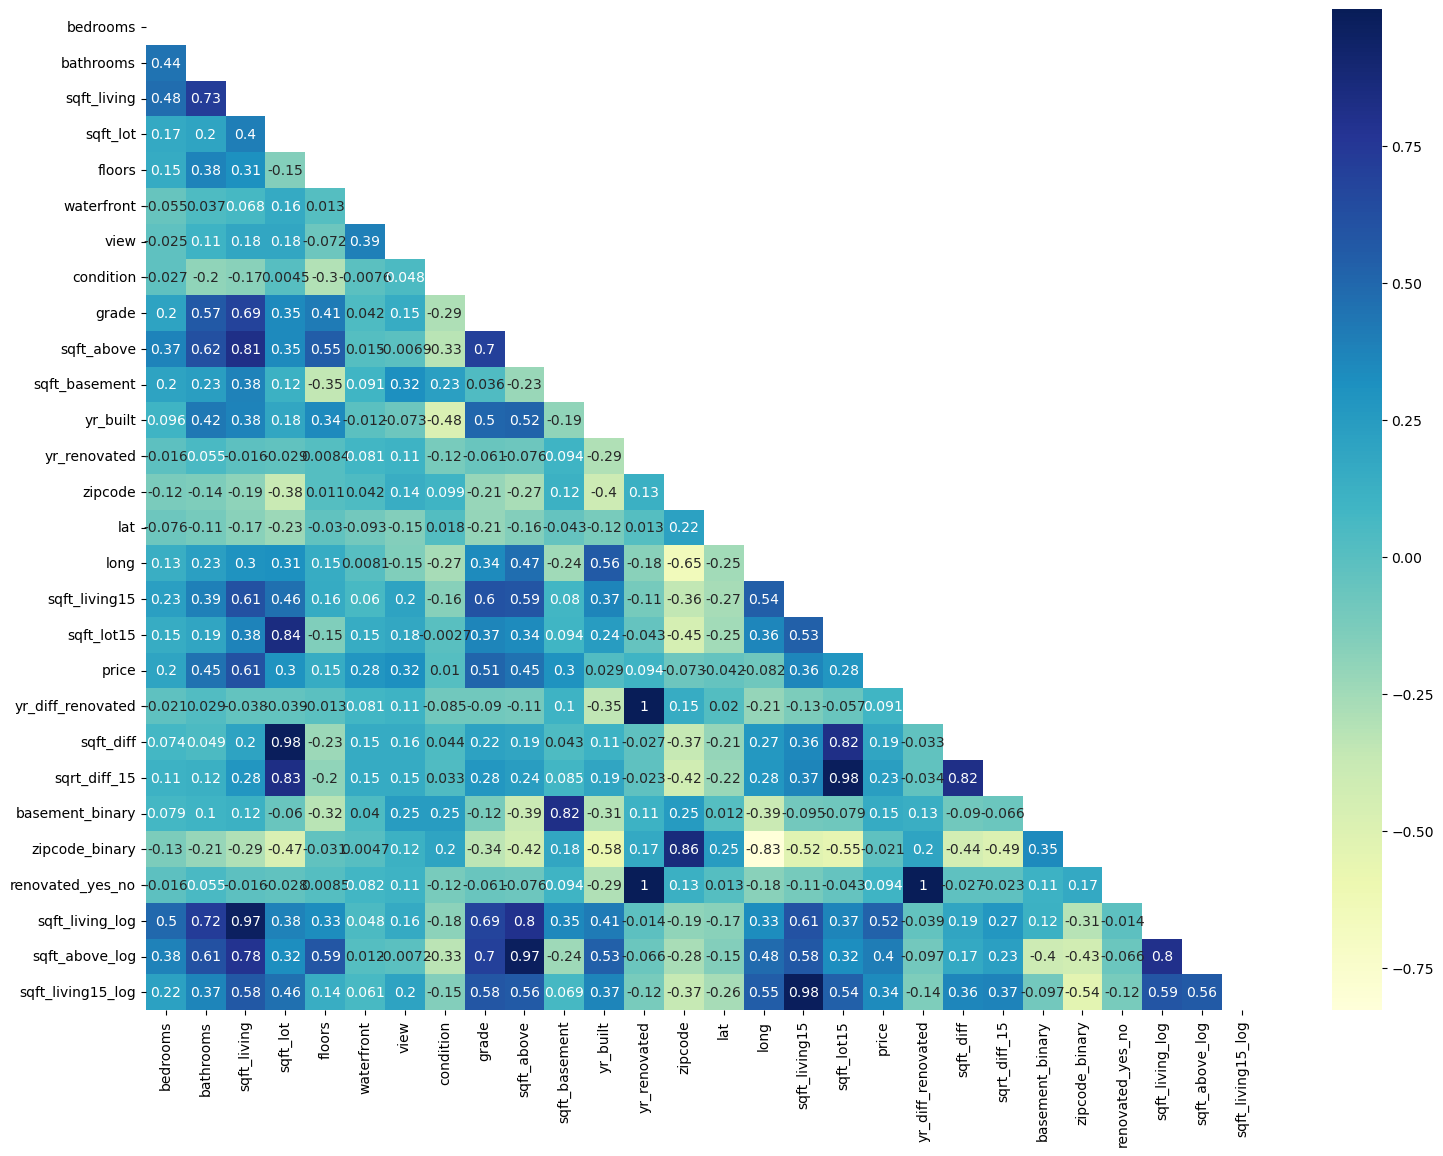

In [29]:
# let's study the correlation again with new columns
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

plt.figure(figsize=(18, 13))
sns.heatmap(corr, annot=True, cmap="YlGnBu", mask=mask)

plt.show()

<span style="color:rgb(255, 0, 255)"> sqft_living_log is highly correlated with sqft_living (obviously), bedrooms, bathrooms, sqft_above, sqft_living15, sqft_living15_log, grade

### <span style="color:rgb(255, 0, 255)">--- Treat some discrete numericals as categoricals and one hot encoding them

In [31]:
# select the columns we want to encode
df_binary = df[["waterfront", "renovated_yes_no", "basement_binary", "zipcode_binary"]]
df_binary.head()


,waterfront,renovated_yes_no,basement_binary,zipcode_binary
1,0,0,1,0
3,0,0,1,1
4,0,0,0,1
5,0,0,0,0
6,0,0,1,1


In [32]:
waterfront_enc = df['waterfront']
waterfront_enc_dumm = pd.get_dummies(waterfront_enc, drop_first=False)
waterfront_enc_dumm

,0,1
1,1,0
3,1,0
4,1,0
5,1,0
6,1,0
...,...,...
5200,1,0
5201,1,0
5202,1,0
5203,1,0


In [33]:
yr_renovated_binary_enc = df['renovated_yes_no']
yr_renovated_binary_enc_dumm = pd.get_dummies(yr_renovated_binary_enc, drop_first=False)
yr_renovated_binary_enc_dumm

,0,1
1,1,0
3,1,0
4,1,0
5,1,0
6,1,0
...,...,...
5200,1,0
5201,1,0
5202,1,0
5203,1,0


In [34]:
basement_binary_enc = df['basement_binary']
basement_binary_enc_dumm = pd.get_dummies(basement_binary_enc, drop_first=False)
basement_binary_enc_dumm

,0,1
1,0,1
3,0,1
4,1,0
5,1,0
6,0,1
...,...,...
5200,1,0
5201,1,0
5202,1,0
5203,1,0


In [35]:
zip_binary_enc = df['zipcode_binary']
zip_binary_enc_dumm = pd.get_dummies(zip_binary_enc, drop_first=False)
zip_binary_enc_dumm

,0,1
1,1,0
3,0,1
4,0,1
5,1,0
6,0,1
...,...,...
5200,1,0
5201,1,0
5202,1,0
5203,1,0


In [36]:
df_binary_encoded = pd.concat([waterfront_enc_dumm, yr_renovated_binary_enc_dumm, basement_binary_enc_dumm, zip_binary_enc_dumm], axis=1)
df_binary_encoded.head()

,0,1,0,1,0,1,0,1
1,1,0,1,0,0,1,1,0
3,1,0,1,0,0,1,0,1
4,1,0,1,0,1,0,0,1
5,1,0,1,0,1,0,1,0
6,1,0,1,0,0,1,0,1


In [37]:
# Concat the one-hot encoded columns with the original dataframe
df = pd.concat([df, df_binary_encoded], axis=1)

In [38]:
df.isna().sum()

bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated         0
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
price                0
yr_diff_renovated    0
sqft_diff            0
sqrt_diff_15         0
basement_binary      0
zipcode_binary       0
renovated_yes_no     0
sqft_living_log      0
sqft_above_log       0
sqft_living15_log    0
0                    0
1                    0
0                    0
1                    0
0                    0
1                    0
0                    0
1                    0
dtype: int64

### <span style="color:rgb(255, 0, 255)">--- Scaling

In [39]:
X_num = df.copy()
X_num = X_num.drop("price", axis = 1)
X_num.columns

Index([         'bedrooms',         'bathrooms',       'sqft_living',
                'sqft_lot',            'floors',        'waterfront',
                    'view',         'condition',             'grade',
              'sqft_above',     'sqft_basement',          'yr_built',
            'yr_renovated',           'zipcode',               'lat',
                    'long',     'sqft_living15',        'sqft_lot15',
       'yr_diff_renovated',         'sqft_diff',      'sqrt_diff_15',
         'basement_binary',    'zipcode_binary',  'renovated_yes_no',
         'sqft_living_log',    'sqft_above_log', 'sqft_living15_log',
                         0,                   1,                   0,
                         1,                   0,                   1,
                         0,                   1],
      dtype='object')

In [40]:
transformer = MinMaxScaler().fit(X_num)
X_num_minmax = transformer.transform(X_num)
X_num_norm = pd.DataFrame(X_num_minmax,columns=X_num.columns)
X_num_normalized = X_num_norm.copy()
X_num_normalized.shape

(4329, 35)

### <span style="color:rgb(255, 0, 255)">--- Test split


In [41]:
X = X_num_normalized.copy()
Y = df["price"]
#Separation between train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42) 

##  4 | Modeling </span>

### <span style="color:rgb(255, 0, 255)">--- Function for the model


In [42]:
def modeling(y, X, models=[], test_size=0.25):
    for model in models:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        model.fit(X_train, y_train )
        predictions = model.predict(X_test)
        r2 = r2_score(y_test, predictions)
        # r2_adj = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
        r2_adj =  1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
        RMSE = mean_squared_error(y_test, predictions, squared=False)
        MSE = mean_squared_error(y_test, predictions)
        MAE = mean_absolute_error(y_test, predictions)
        print(model, 'metrics are: '), print("R2 =", r2), print("R2 adjusted =", r2_adj), print("RMSE =", round(RMSE,2)), print("MSE =", round(MSE,2)), print("MAE =", round(MAE,2))
    return predictions, y_test, r2

### <span style="color:rgb(255, 0, 255)">--- Trying different models


In [43]:

predictions, y_test, r2 = modeling(Y, X, models=[LinearRegression(), KNeighborsRegressor(n_neighbors=9), DecisionTreeRegressor(max_depth=10),RandomForestRegressor(n_estimators=100, max_depth=10)], test_size=0.24)

LinearRegression() metrics are: 
R2 = 0.6367304387068904
R2 adjusted = 0.6545152401661337
RMSE = 255382.62
MSE = 65220284785.2
MAE = 171481.17
KNeighborsRegressor(n_neighbors=9) metrics are: 
R2 = 0.638556879065429
R2 adjusted = 0.6579585622245382
RMSE = 254739.81
MSE = 64892371375.93
MAE = 148506.72
DecisionTreeRegressor(max_depth=10) metrics are: 
R2 = 0.4843981676881042
R2 adjusted = 0.8195208982690239
RMSE = 304252.44
MSE = 92569545930.16
MAE = 170488.85
RandomForestRegressor(max_depth=10) metrics are: 
R2 = 0.7336147418198918
R2 adjusted = 0.8798138261440168
RMSE = 218691.52
MSE = 47825978976.17
MAE = 132595.61


##  5 | Evaluating the model </span>

In [45]:
# Coefficient values

reg = LinearRegression()
reg.fit(X_train, y_train)

# Get the coefficients and feature names
coef = reg.coef_
feature_names = df.columns

# Print the coefficients and feature names
for feature, coef in zip(feature_names, coef):
    print(f"{feature}: {coef:.2f}")
    
# high negative of positive coef: bedrooms,sqft_living, sqft_lot, floors, waterfront, view, grade, sqft_above, yr_built, yr_renovated, zipcode, lat, sqft_lot15, day_bought, year_bought, yr_diff_renovated, yr_diff_bought, sqrt_diff, sqrt_diff_15, yr_renovated_binary     

bedrooms: -180612.33
bathrooms: 415936.37
sqft_living: 2552691.77
sqft_lot: 507101.85
floors: -109251.14
waterfront: 221049.11
view: 78315.80
condition: 147851.04
grade: 856495.51
sqft_above: 2816553.08
sqft_basement: 1241448.34
yr_built: -73645.05
yr_renovated: 1899266.42
zipcode: -528182.31
lat: 280318.56
long: -635644.46
sqft_living15: -964160.47
sqft_lot15: -102638.56
price: 1801545.80
yr_diff_renovated: -532915.98
sqft_diff: 154537.30
sqrt_diff_15: 14218.09
basement_binary: 49711.33
zipcode_binary: -1174949.33
renovated_yes_no: -2971871.49
sqft_living_log: 116415.16
sqft_above_log: 1178156.06
sqft_living15_log: -221049.11
0: 221049.11
1: 1174949.33
0: -1174949.33
1: -14218.09
0: 14218.09
1: -49711.33
0: 49711.33


In [52]:
 #let's dive in feature importance of linnear regression model

X_feature = X
y_feature = Y

# create a linear regression object
reg = LinearRegression()

# fit the linear regression model on the data
reg.fit(X_feature, y_feature)

# print the coefficients and their corresponding feature names
coefficients = pd.DataFrame({'feature': X_feature.columns, 'coefficient': reg.coef_})
coefficients = coefficients.sort_values('coefficient', ascending=False)
print(coefficients)


              feature   coefficient
12       yr_renovated  3.590216e+06
18  yr_diff_renovated  3.398182e+06
9          sqft_above  2.642623e+06
2         sqft_living  2.446103e+06
29                  0  2.234309e+06
10      sqft_basement  1.282978e+06
26  sqft_living15_log  9.032647e+05
8               grade  8.536433e+05
3            sqft_lot  5.147207e+05
1           bathrooms  4.195443e+05
14                lat  2.834242e+05
25     sqft_above_log  2.797225e+05
28                  1  2.217184e+05
5          waterfront  2.217184e+05
7           condition  1.468819e+05
20       sqrt_diff_15  8.633543e+04
6                view  8.163061e+04
34                  1  4.812149e+04
22     zipcode_binary  4.812149e+04
32                  1  1.236850e+04
21    basement_binary  1.236850e+04
11           yr_built -3.851136e+03
31                  0 -1.236850e+04
33                  0 -4.812149e+04
17         sqft_lot15 -7.975410e+04
4              floors -1.271785e+05
0            bedrooms -1.833

This is what it gives us which columns have more importance calculating the target, which in this case is the price. For this porpuse, the features: Sqft living after renovation and log transformed, Grade and View